# Purpose
This section just lists the code used from drawing figures in the notebook 01_svm_foundational_maths for completeness

##### Figure1 : Decision rule

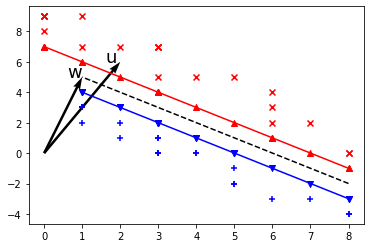

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

gutter1_intercept = 5
midpoint_intercept = 6
gutter2_intercept = 7
slope = -1

fig, ax = plt.subplots()

vec_w_dir = 1
vec_w_size = 5
vec_u_dir = 2
vec_u_size = 6
offset = 0.4

ax.quiver(0, 0, vec_w_dir , 5, angles='xy', scale_units='xy', scale=1)
ax.annotate('w', (vec_w_dir - offset, vec_w_size ),fontsize=18)
ax.quiver(0, 0, vec_u_dir , vec_u_size, angles='xy', scale_units='xy', scale=1)
ax.annotate('u', (vec_u_dir-offset , vec_u_size),fontsize=18)

def ymxb(slope, intercept, x):
    return slope * x + intercept

num_points = 10
x1 = [random.randrange(start=0, stop=9) for i in range(20)]
x2 = [random.randrange(start=0, stop=9) for i in range(20)]
y1 = [ymxb(slope, gutter1_intercept, x) - random.randrange(start=1, stop=3) for x in x1]
y2 = [ymxb(slope, gutter2_intercept, x) + random.randrange(start=1, stop=4) for x in x2]

gutter_y1 = [ymxb(slope, gutter1_intercept, x) for x in x1]
gutter_y2 = [ymxb(slope, gutter2_intercept, x) for x in x2]
midpoint_y1 = [ymxb(slope, midpoint_intercept, x) for x in x1]

plt.scatter(x1, y1, c='blue', marker = '+')
plt.scatter(x2, y2, c='red', marker = 'x')
plt.scatter(x1, gutter_y1, c='blue', marker = 'v')
plt.scatter(x2, gutter_y2, c='red', marker = '^')

plt.plot([max(x1) ,min(x1)],[min(gutter_y1) ,max(gutter_y1) ], c='blue')
plt.plot([max(x1) ,min(x1)],[min(midpoint_y1) ,max(midpoint_y1) ], c='black', linestyle="--")
plt.plot([max(x1), min(x2)],[min(gutter_y2), max(gutter_y2)], c='red')



plt.show()

#### Figure 2 : Width of the hyperplane

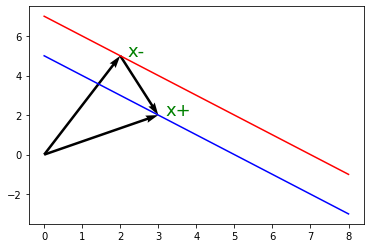

In [3]:
gutter1_intercept = 5
midpoint_intercept = 6
gutter2_intercept = 7
slope = -1

fig, ax = plt.subplots()

vec_w_x = 3
vec_w_y = 2
vec_u_x = 2
vec_u_y = 5
offset = -0.2

ax.quiver(0, 0, vec_w_x , vec_w_y, angles='xy', scale_units='xy', scale=1)
ax.annotate('x+', (vec_w_x - offset,vec_w_y),fontsize=18, color="green")
ax.quiver(0, 0, vec_u_x, vec_u_y, angles='xy', scale_units='xy', scale=1)
ax.annotate('x-', (vec_u_x-offset ,vec_u_y),fontsize=18, color="green")
ax.quiver(vec_u_x, vec_u_y, vec_w_x-vec_u_x, vec_w_y - vec_u_y, scale=1, angles='xy', scale_units='xy', linestyle='--')

def ymxb(slope, intercept, x):
    return slope * x + intercept

num_points = 10
x1 = [random.randrange(start=0, stop=9) for i in range(20)]
x2 = [random.randrange(start=0, stop=9) for i in range(20)]
y1 = [ymxb(slope, gutter1_intercept, x) - random.randrange(start=1, stop=3) for x in x1]
y2 = [ymxb(slope, gutter2_intercept, x) + random.randrange(start=1, stop=4) for x in x2]

gutter_y1 = [ymxb(slope, gutter1_intercept, x) for x in x1]
gutter_y2 = [ymxb(slope, gutter2_intercept, x) for x in x2]

plt.plot([max(x1) ,min(x1)],[min(gutter_y1) ,max(gutter_y1) ], c='blue')
plt.plot([max(x1), min(x2)],[min(gutter_y2), max(gutter_y2)], c='red')
plt.show()

### Figure


[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


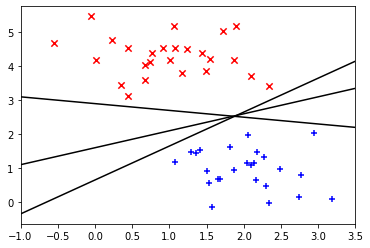

In [15]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

print(y)
xfit = np.linspace(-1, 3.5)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

marker = ['x', '+']
colormap = ['red', 'blue']
for group in set(y):
    plt.scatter(
        X[y==group, 0], X[y==group, 1], # filter by group
        marker=marker[group],           # set marker per group
        label=group,                    # set legend label
        s=40,c=colormap[group],  cmap=plt.cm.Paired, edgecolors='k',
    )


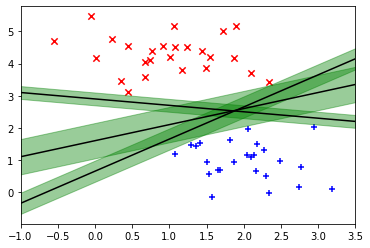

In [20]:
xfit = np.linspace(-1, 3.5)
marker = ['x', '+']
colormap = ['red', 'blue']
for group in set(y):
    plt.scatter(
        X[y==group, 0], X[y==group, 1], # filter by group
        marker=marker[group],           # set marker per group
        label=group,                    # set legend label
        s=40,c=colormap[group],  cmap=plt.cm.Paired, edgecolors='k',
    )


for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='green', alpha=0.4)

plt.xlim(-1, 3.5);